Our Zillow scenario continues:


As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.


In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.


1) As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle as w
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train, validate, test = w.wrangle_zillow()
train.shape, validate.shape, test.shape

((29201, 9), (12515, 9), (10430, 9))

In [3]:
train.to_csv('zillow_train.csv')

#### Only explore on train dataset!

3) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
# def plot_variable_pairs(df):
def plot_variable_pairs(df):
    sns.set_theme(style = 'darkgrid', color_codes=True)
    pairplot = sns.pairplot(df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'yellow'}}, diag_kws=dict(fill=False))
    plt.show()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

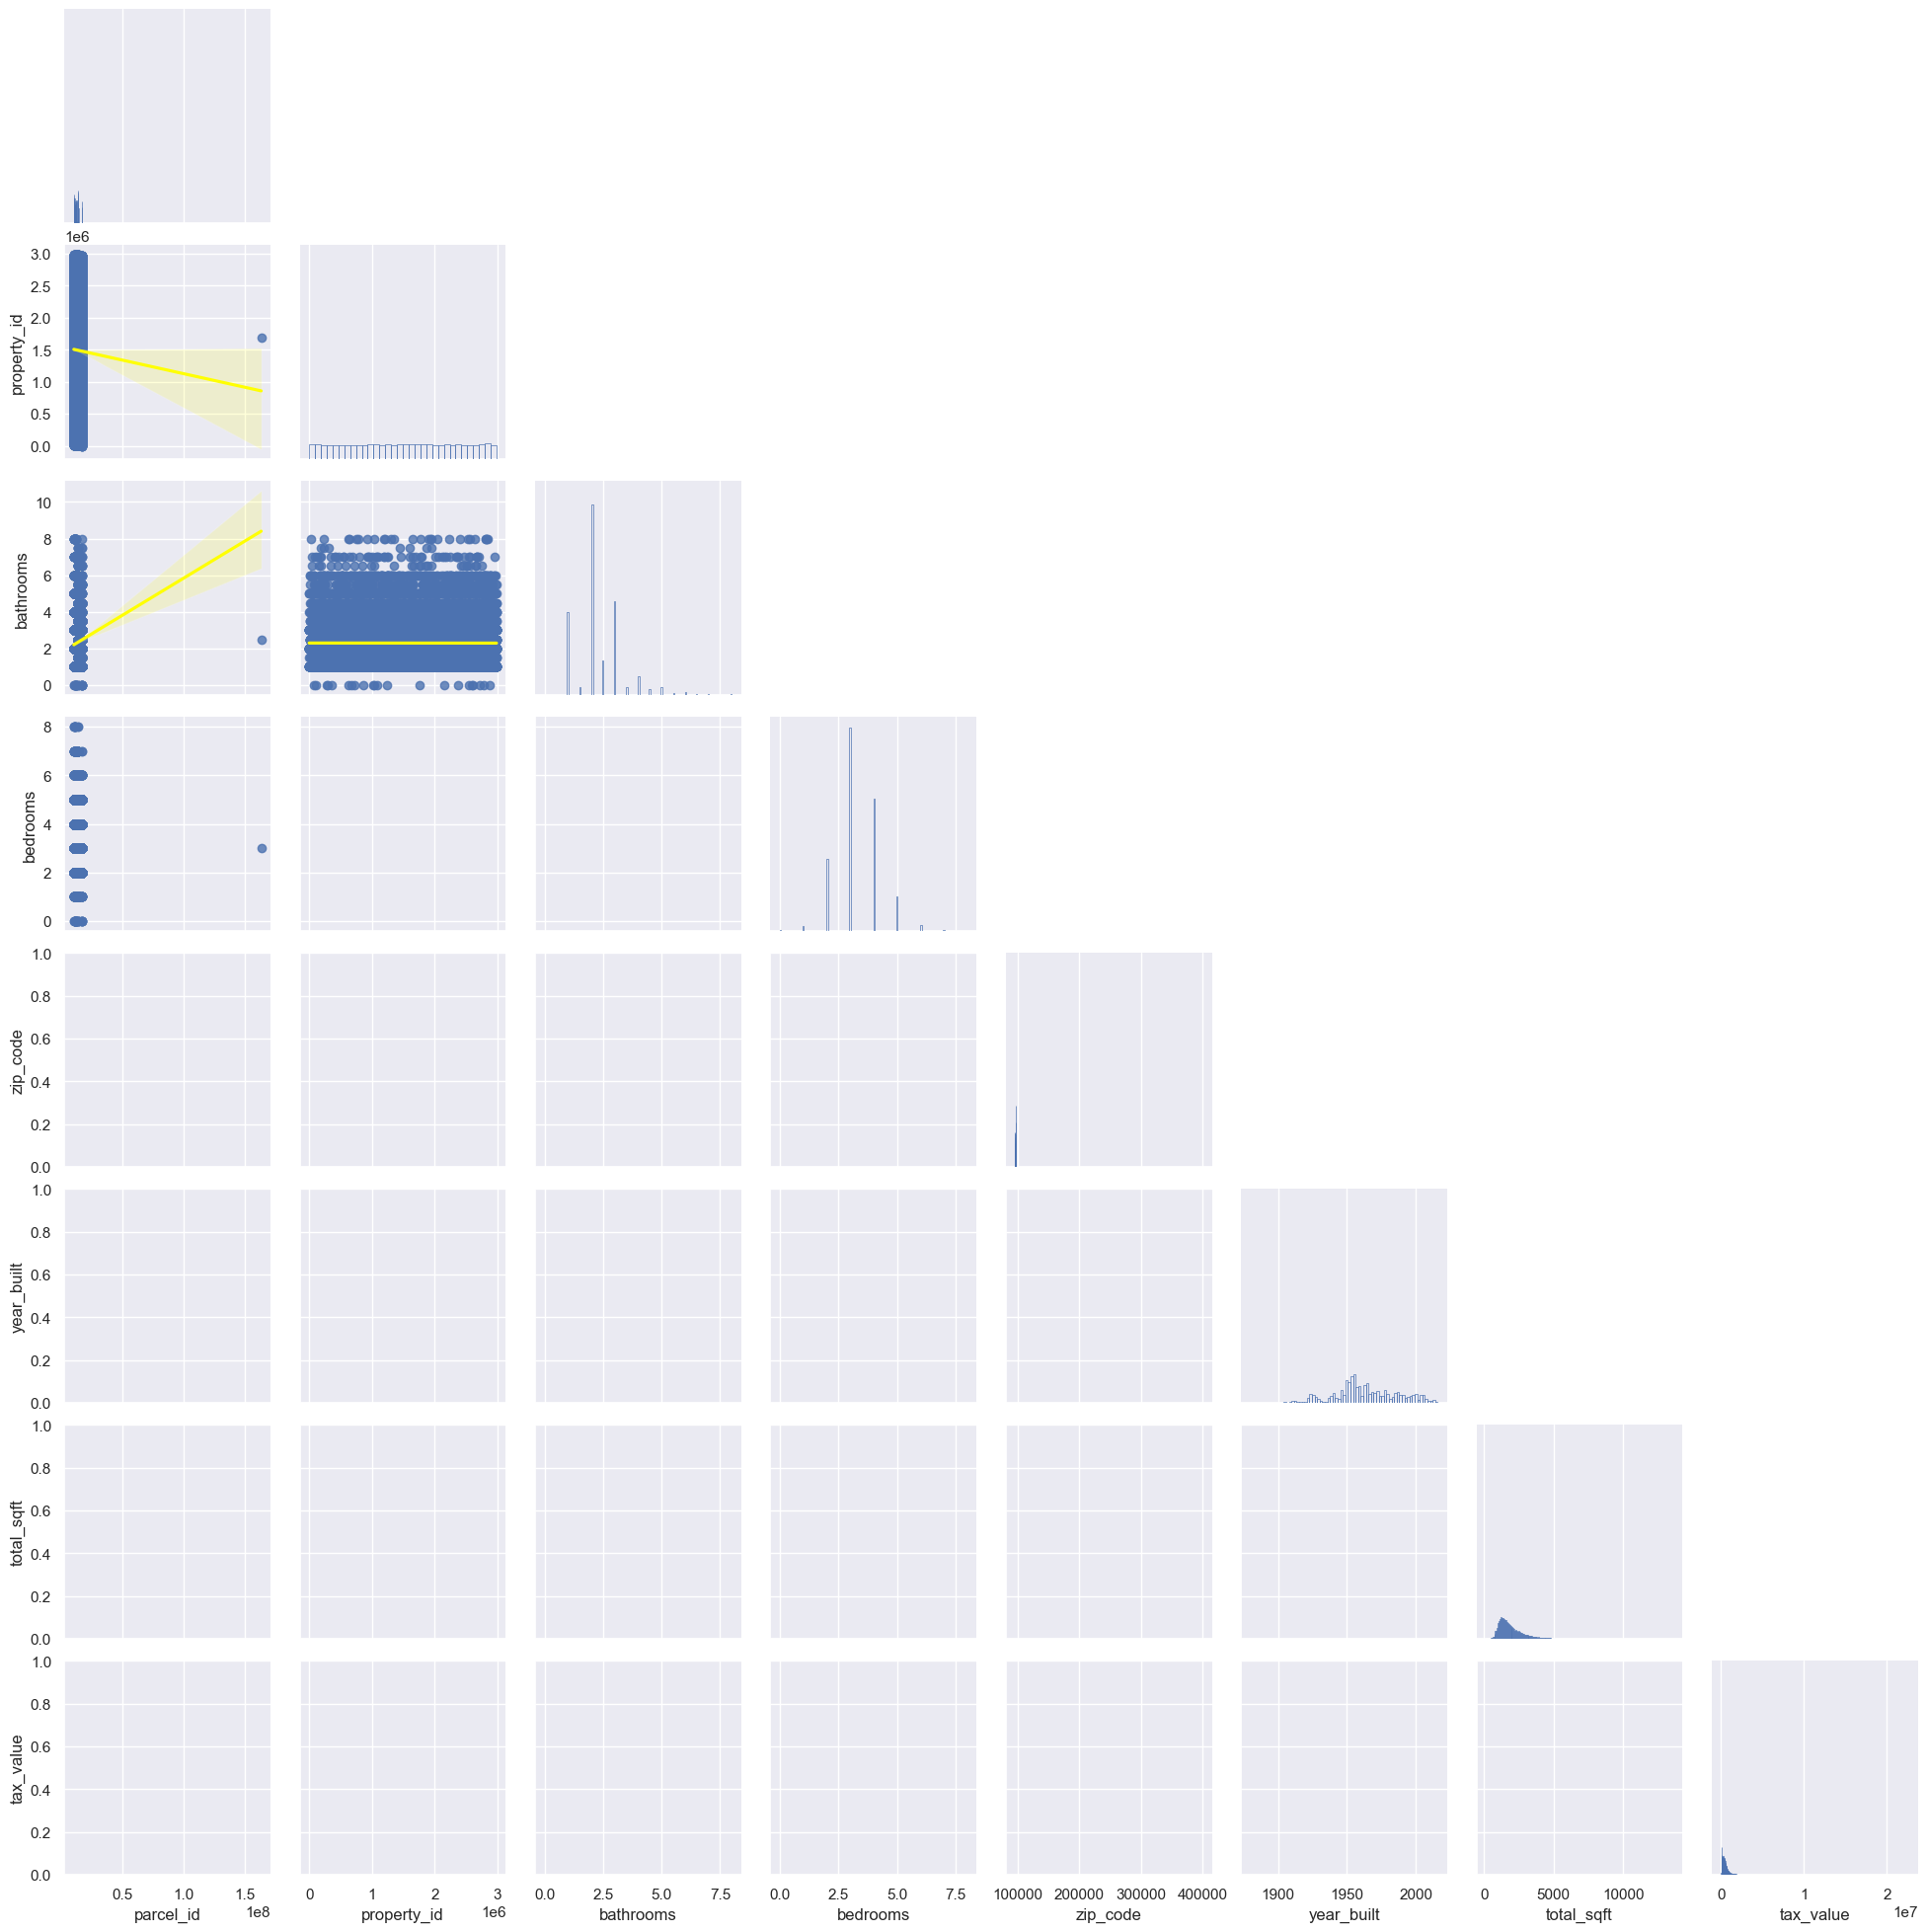

In [5]:
plot_variable_pairs(train)

In [ ]:
#function was taking too long so I made a sample df 
train_sample = train.sample(frac = .25, random_state=123)
train_sample.head()


In [ ]:
# train_sample.to_csv('train_sample.csv')

In [ ]:
# train_sample_csv = plot_variable_pairs(train_sample)

In [ ]:
# see if I can import the png of the pairplot  without having to wait 10 minutes to plot a new one


In [ ]:
# train_sample_csv_2 = pd.read_csv('train_sample.csv')

In [ ]:
# train_sample_csv_2.head()

4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

continuous to categorical plots:
- violin
- catplot
- sunburst
- boxplot
- swarmplot
- striplot

In [ ]:
train.info()

In [ ]:
train.fips.nunique()
#only 3 different fips?  should I remove this feature?

In [ ]:
# train_sample.head()

In [ ]:
#make smaller sample for experimenting
# train_sample_smaller = train_sample.sample(frac = .25, random_state=123)

In [ ]:
# sns.violinplot(data = train_sample_smaller, x = train_sample_smaller['tax_value'], y = train_sample_smaller['area'])

^^ Wut...

In [ ]:
continuous_cols = ['area', 'tax_value', 'year_built']
categorical_cols = ['bedroom', 'bathrooms', 'fips', 'propertylandusetypeid']

def plot_categorical_and_continuous_vars(df, x, y):

   for col in continuous_cols:
    sns.violinplot(col)
    plt.show
    sns.catplot(x,y)
    plt.show
    sns.boxplot(x,y)
    plt.show
    
#doesn't do what I want it to do

In [ ]:
# plot_categorical_and_continuous_vars(train_sample_csv_2, x, y)


5) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6) Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7) Come up with some initial hypotheses based on your goal of predicting property value.

8) Visualize all combinations of variables in some way.

9) Run the appropriate statistical tests where needed.

10) What independent variables are correlated with the dependent variable, home value?

11) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13) Explore your dataset with any other visualizations you think will be helpful.